# Практична робота №8.Жадібні алгоритми. Наближене розв’язання екстремальних задач
## Підготува: Саєнко Олексій

## 1. Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.
## Заданий зважений граф: [(1,7,15), (1,3,6), (1,5,7), (1,6,6), (1,2,4),
## (2,4,10), (3,5,10),(3,7,5),(3,6,5), (4,7,3),(4,5,15),(5,6,5)](1 варіант)


``` python
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt

INFINITY = float('inf')
G = nx.Graph()

# Додаємо зважені ребра графа
edges = [
    (1, 7, 15), (1, 3, 6), (1, 5, 7), (1, 6, 6), (1, 2, 4),
    (2, 4, 10), (3, 5, 10), (3, 7, 5), (3, 6, 5),
    (4, 7, 3), (4, 5, 15), (5, 6, 5)
]
G.add_weighted_edges_from(edges)

# Обчислення довжини маршруту
def get_path_length(path):
    path_length = 0
    for i, v1 in enumerate(path):
        v2 = path[(i + 1) % len(path)]  # повернення до початку
        if not G.has_edge(v1, v2):
            return INFINITY
        path_length += G[v1][v2]["weight"]
    return path_length

# Генерація всіх перестановок з фіксованою стартовою вершиною
def node_permutations(graph_obj, init_node_index):
    all_nodes = list(graph_obj.nodes())
    init_node = all_nodes[init_node_index]
    remaining = [node for node in all_nodes if node != init_node]
    return [[init_node] + list(p) for p in permutations(remaining)]

# Реалізація TSP повним перебором
def TSP_BruteForce(graph_obj, init_node_index):
    min_path = None
    min_cost = INFINITY
    for path in node_permutations(graph_obj, init_node_index):
        cost = get_path_length(path)
        if cost < min_cost:
            min_path, min_cost = path, cost
    return min_path, min_cost

# Візуалізація графа
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=16)
nx.draw_networkx_edges(G, pos)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Граф із вагами ребер")
plt.axis('off')
plt.show()

# Запуск пошуку TSP
start_node_index = 0  # вершина 1
path, cost = TSP_BruteForce(G, start_node_index)
if path:
    print(f"Оптимальний маршрут: {path + [path[0]]}")
    print(f"Загальна вага: {cost}")
else:
    print("Маршрут не знайдено.")
```
Оптимальний маршрут: [1, 5, 6, 3, 7, 4, 2, 1]
Загальна вага: 39
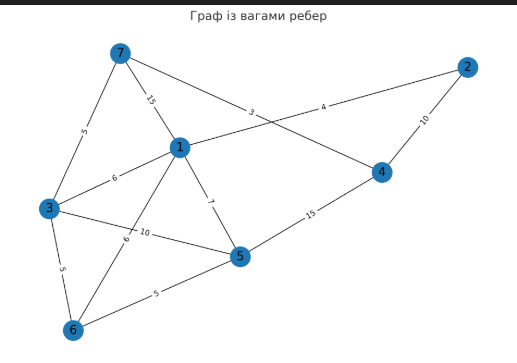

## 2. Обґрунтувати асимптотику для обох алгоритмів.
Груба сила має складність O(n!), бо перебирає всі перестановки вершин ((n-1)!) і для кожної рахує довжину маршруту (O(n)), а алгоритм найближчого сусіда має O(n^2) у простій реалізації, але з використанням структур даних для швидкого пошуку (O(log n)) його складність стає O(n^2 * log n)

## 3. Контрольні питання 
- Що таке жадібний алгоритм? Жадібний алгоритм — це евристичний підхід, який використовується для пошуку приблизного розв’язання задач на оптимізацію, шляхом послідовного вибору найкращого варіанту на кожному кроці.
- Які основні принципи роботи жадібних алгоритмів?Алгоритм діє крок за кроком, у кожній ситуації обираючи варіант, який здається найвигіднішим у даний момент, з надією, що такий підхід приведе до загального оптимального результату.
- Чим відрізняється жадібний алгоритм від динамічного програмування? Динамічне програмування розв’язує задачу через збереження результатів підзадач і їх повторне використання, тоді як жадібний підхід не повертається до попередніх рішень і орієнтується лише на поточний вибір.
- Які задачі можна розв’язати жадібними алгоритмами?
Прикладами є задача про рюкзак (частковий варіант), пошук найкоротшого шляху в графах без від’ємних ваг, а також задача мінімального покриття множини.
- Які обмеження мають жадібні алгоритми? Їх основний недолік у тому, що жадібні вибори не завжди ведуть до глобального оптимуму, тому вони можуть не дати правильного результату для задач із негативними вагами або складною залежністю між елементами.
- Чому жадібні алгоритми популярні для наближених рішень? Через їхню простоту реалізації, ефективність і швидкість, жадібні алгоритми часто застосовують, коли точний розв’язок складний або потребує забагато ресурсів.